
# Welcome to my first Data Science project 

### by Antoine Presty
                                      
                

## Overview : 
 **The goal is to extract 911 calls data (from Kaggle), then explore and display this data in graph in order to bring out as much information as possible**.


## Setup

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
df = pd.read_csv("911.csv")

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [91]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Data exploration

**In this section, I will be exploring the data in order to analyze it and find some correlation between them.**

### Top 5 townships for 911 calls

In [92]:
df['twp'].value_counts().head(5) 

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [93]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])
print('the number one reason for 911 calls : {}'.format(
    df['reason'].value_counts().head(1)))

the number one reason for 911 calls : EMS    332692
Name: reason, dtype: int64


In [94]:
df['Dpt'] = df['title'].apply(lambda title: title.split(':')[1])
print('the number one department for 911 calls : {}'.format(
    df['Dpt'].value_counts().head(1)))

the number one department for 911 calls :  VEHICLE ACCIDENT -    148372
Name: Dpt, dtype: int64


### Top 5 zipcodes for 911 calls

In [95]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

**I am looking to group information by year to find the town with the highest number of 911 calls by year.**

In [96]:
df['year'] = df['timeStamp'].str[:4]

In [97]:
df.groupby('year').apply(print)

            lat        lng                                               desc  \
0     40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1     40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2     40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3     40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4     40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   
...         ...        ...                                                ...   
7911  40.291231 -75.271800  BETHLEHEM PIKE & SWARTLEY RD; BUCKS COUNTY; 20...   
7912  40.136020 -75.354606  BEECH DR & SPRUCE ST;  WEST NORRITON; Station ...   
7913  40.294817 -75.537972  BIG RD & COLONIAL RD;  UPPER FREDERICK; Statio...   
7914  40.112336 -75.150554  ROBERTS AVE & JENKINTOWN RD;  ABINGTON; Statio...   
7915  40.081127 -75.160484  LIMEKILN PIKE & EVERGREEN AVE; CHELTENHAM; 201...   

          zip              

""


In [98]:
df1 = df[['twp', 'year']]
df1

,twp,year
0,NEW HANOVER,2015
1,HATFIELD TOWNSHIP,2015
2,NORRISTOWN,2015
3,NORRISTOWN,2015
4,LOWER POTTSGROVE,2015
...,...,...
663517,EAST NORRITON,2020
663518,LOWER PROVIDENCE,2020
663519,LOWER MERION,2020
663520,NORRISTOWN,2020


In [99]:
year_list = df['year'].unique()
print(year_list)

['2015' '2016' '2017' '2018' '2019' '2020']


## Result

In [134]:
for year in year_list :  
    print('Town with the highest number of 911 calls {}, total 911 calls for this town: {}'.format(
    df1.loc[df1['year'] == year].value_counts().idxmax(), df1.loc[df1['year'] == year].value_counts().max()))   

Town with the highest number of 911 calls ('LOWER MERION', '2015'), total 911 calls for this town: 593
Town with the highest number of 911 calls ('LOWER MERION', '2016'), total 911 calls for this town: 12332
Town with the highest number of 911 calls ('LOWER MERION', '2017'), total 911 calls for this town: 12048
Town with the highest number of 911 calls ('LOWER MERION', '2018'), total 911 calls for this town: 13059
Town with the highest number of 911 calls ('LOWER MERION', '2019'), total 911 calls for this town: 12133
Town with the highest number of 911 calls ('LOWER MERION', '2020'), total 911 calls for this town: 5325


## Data Visualisation

**In this section I want to visualize the data and plot some histogram and graphs to show results.**

**We can see that EMS are the number one reason for 911 Calls followed by Traffic.** 

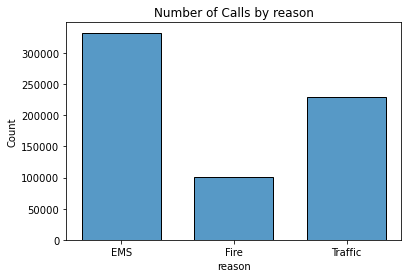

In [137]:
sns.histplot(data = df,x='reason',shrink=.7) # Histogram of 911 calls by reason 
plt.title('Number of Calls by reason')
plt.ylabel('Count')
plt.show()

**Here I'm doing some data preparation. My goal is to create new columns (Year, Month,Date,Hour) based on the column Timestamp.**

In [102]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [103]:
df['timeStamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 663522 entries, 0 to 663521
Series name: timeStamp
Non-Null Count   Dtype         
--------------   -----         
663522 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.1 MB


In [104]:
df['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
663517   2020-07-29 15:46:51
663518   2020-07-29 15:52:19
663519   2020-07-29 15:52:52
663520   2020-07-29 15:54:08
663521   2020-07-29 15:52:46
Name: timeStamp, Length: 663522, dtype: datetime64[ns]

In [105]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   lat          663522 non-null  float64       
 1   lng          663522 non-null  float64       
 2   desc         663522 non-null  object        
 3   zip          583323 non-null  float64       
 4   title        663522 non-null  object        
 5   timeStamp    663522 non-null  datetime64[ns]
 6   twp          663229 non-null  object        
 7   addr         663522 non-null  object        
 8   e            663522 non-null  int64         
 9   reason       663522 non-null  object        
 10  Dpt          663522 non-null  object        
 11  year         663522 non-null  object        
 12  Hour         663522 non-null  int64         
 13  Month        663522 non-null  int64         
 14  Day of Week  663522 non-null  int64         
dtypes: datetime64[ns](1), float64(3), 

**We can see that the column Day of the week is composed by integer. I want to change that for strings (MONDAY, TUESDAY, ...).
So I create a key 'dmap' and then I apply 'dmap' to my new column with the map function.**

In [107]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [108]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [109]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Dpt,year,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015,16,12,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic,VEHICLE ACCIDENT -,2020,15,7,Wed
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS,GENERAL WEAKNESS,2020,15,7,Wed
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS,VEHICLE ACCIDENT,2020,15,7,Wed
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,BUILDING FIRE,2020,15,7,Wed


**This graph shows reasons of 911 calls classed by day of the week. First of all, we can see that there is no correlation between EMS and days. EMS are happening every day approximatively equals. Secondly, we can see that Traffic calls tend to be less by the end of the week (Saturday and Sunday). People take their vehicle less on week-end"**.

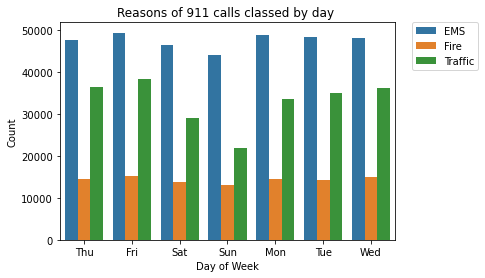

In [140]:
sns.countplot(x='Day of Week',data=df,hue='reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Reasons of 911 calls classed by day ')
plt.ylabel('Count')
plt.show()


**This graph shows reasons of 911 calls classed by month.**

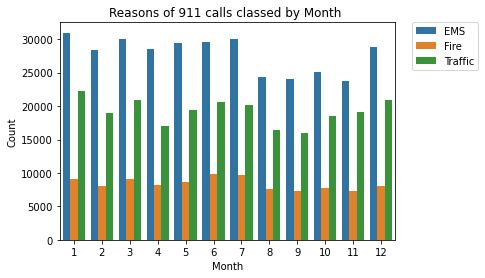

In [143]:
sns.countplot(x='Month',data=df,hue='reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Reasons of 911 calls classed by Month ')
plt.ylabel('Count')
plt.show()


**Now I want to show information by month with using groupby method.**

In [112]:
byMonth = df.groupby('Month').count()

In [113]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Dpt,year,Hour,Day of Week
Month,,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509,57509


**This graph shows Calls per month. The peak is in January where there is approx. 62 000 calls.**

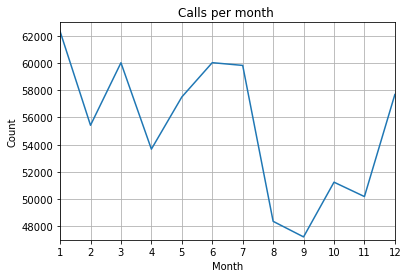

In [114]:
byMonth['desc'].plot()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Calls per month ')
plt.grid(True)
plt.xticks(range(1,13))
plt.axis([1, 12, 47000, 63000])
plt.show()

**Based on the result of my analysis and my comprehension of the dataframe, I want to make prediction on call per month. So I use Seaborn and the lmplot method to draw a linear regression on calls per month. We can clearly see that my result are quite good because of the dot who are outside the blue range. This is probably due to the missing data and Nan value. Also we can see that my prediction in december and january tend to be less acurate because of the large range of value.**

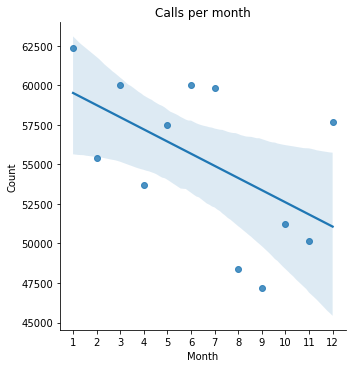

In [115]:
sns.lmplot(x='Month', y='desc', data=byMonth.reset_index(), fit_reg=True)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Calls per month')
plt.xticks(range(1,13))
plt.show()

**Here I want to see the number of calls by year where the reason is Fire.**

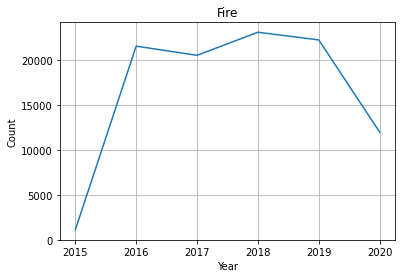

In [147]:
df[df['reason']=='Fire'].groupby('year').count()['desc'].plot()
plt.title('Fire')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

**Here I want to see the number of calls by year where the reason is Traffic.**

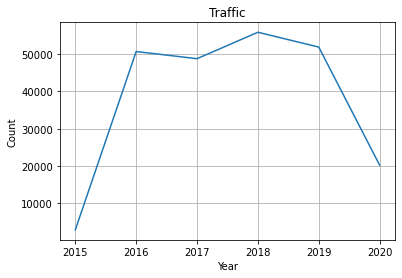

In [148]:
df[df['reason']=='Traffic'].groupby('year').count()['desc'].plot()
plt.title('Traffic')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

**Here I want to see the number of calls by year where the reason is EMS.**

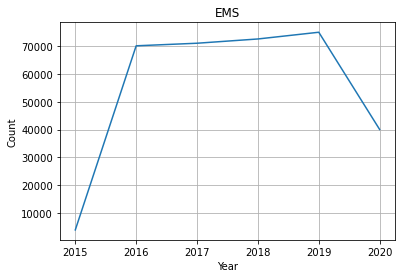

In [133]:
df[df['reason']=='EMS'].groupby('year').count()['desc'].plot()
plt.title('EMS')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

*Made by Antoine Presty. 2022-11-06*